In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [5]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file
import sys
sys.path.append('../')


#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
import scipy.special as sp #for the zeta function sp.zeta() in the 0x2 term


#-------BB parameters (to start)--------
A_BB = 1.7e3
alpha_BB = -3.0
beta_BB = -3.2
# beta_sigma = 1.5e-6

A_beta = 1e-6
gamma_BB = -2.1 #needs to be less than -2 for the 0x2 term to converge
nu0 = 95e9

nside=128

crit = 2/np.log(10)
sigma_default = crit/3

# #-------map paramters--------------------
# nside = 128
# Lmax = 3*nside
# ells = np.arange(0,Lmax)

#define list of frequencies going from 10 to 300 GHz, sampling 20 points
freqs = np.linspace(30,300,4)*1.e9
ells = np.arange(384)

filepath = '/Users/alex/Documents/foreground_figures/'
#file path to put figures in

Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: [Errno 2] No such file or directory: '../../w3j.npy'

In [ ]:
small_scale_cls = ff.powerlaw(ells, A_BB, alpha_BB)
large_scale_cls = ff.powerlaw(ells, A_BB, 2*alpha_BB)
very_small_cls = ff.powerlaw(ells, A_BB, alpha_BB/2)

In [ ]:
figure(figsize=(8,6))
loglog(ells, small_scale_cls, label=r'$\alpha$')
loglog(ells, large_scale_cls, label=r'$2\alpha$')
loglog(ells, very_small_cls, label=r'$\alpha$/2')
xlabel('$\ell$', fontsize=14)
ylabel('$C_\ell$', fontsize=14)
title('Example power law power spectra')
legend()
savefig(filepath + 'example PS.png')#, transparent=True)

In [4]:
very_small_map =  hp.synfast(very_small_cls, nside, new=True, verbose=False)

NameError: name 'very_small_cls' is not defined

In [3]:
hp.mollview(very_small_map, unit=r'$\mu \rm K$',  title='')
savefig(filepath + 'map fine', transparent=True)

NameError: name 'very_small_map' is not defined

In [13]:
small_map = hp.synfast(small_scale_cls, nside, new=True, verbose=False)

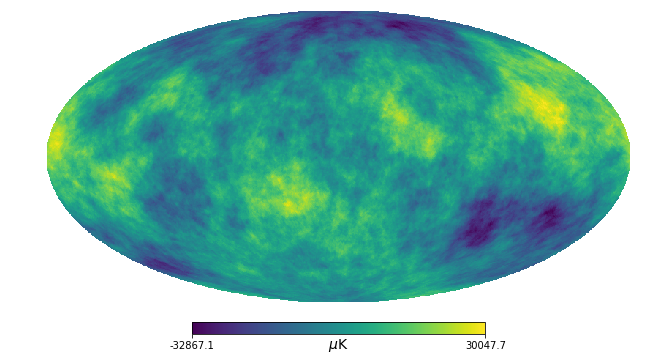

In [14]:
hp.mollview(small_map, unit=r'$\mu \rm K$', title='')
savefig(filepath + 'map normal', transparent=True)

In [15]:
big_map = hp.synfast(large_scale_cls, nside, new=True, verbose=False)

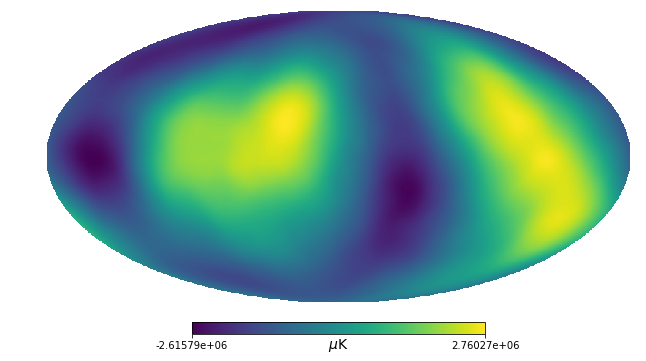

In [16]:
hp.mollview(big_map, unit=r'$\mu \rm K$', title='')
savefig(filepath + 'map coarse', transparent=True)

# try plotting spherical harmonics
want to plot 
$$
Y_{00}, Y_{-11}, Y_{01}, Y_{11}, Y_{4m}
$$

In [17]:
big_alms = hp.map2alm(big_map)

In [18]:
big_alms.shape

(73920,)

In [19]:
alm = np.zeros_like(big_alms, dtype=complex)
alm[12] = 1

In [20]:
print(alm)
type(alm)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


numpy.ndarray

In [21]:
map1 = hp.alm2map(alm, 128)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


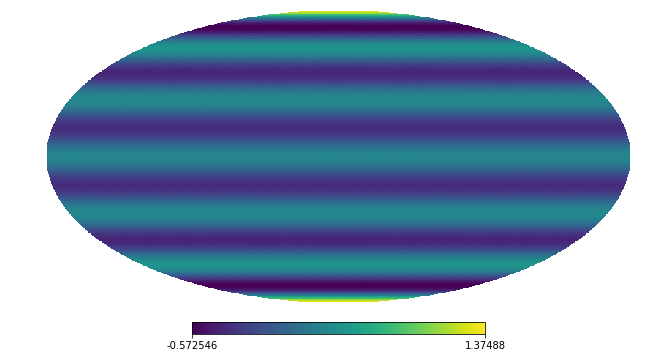

In [22]:
hp.mollview(map1, title='')

In [23]:
temp_cls = hp.anafast(big_map)

In [24]:
cls = np.zeros_like(temp_cls)
cls[1] = 1

In [25]:
map2 = hp.synfast(cls, nside, new=True, verbose=False)

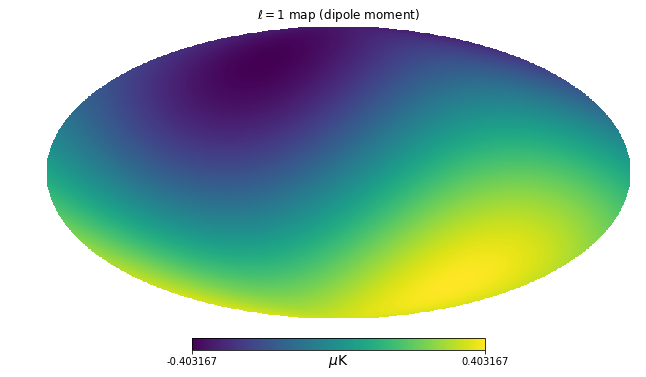

In [26]:
hp.mollview(map2, unit=r'$\mu \rm K$', title=r'$\ell=1$ map (dipole moment)')
savefig(filepath + 'dipole map')

In [27]:
cls = np.zeros_like(temp_cls)
cls[4] = 1

In [49]:
map2 = hp.synfast(cls, nside, new=True, verbose=False)

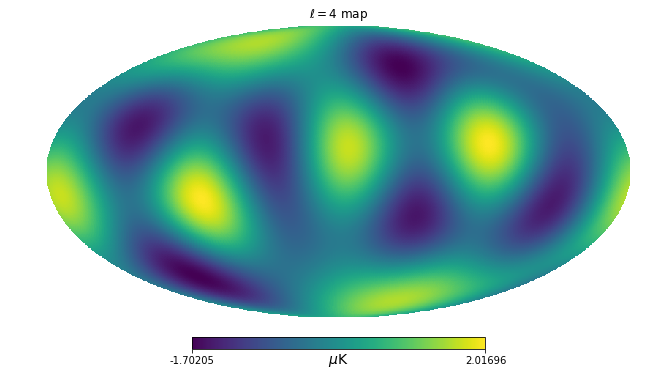

In [50]:
hp.mollview(map2, unit=r'$\mu \rm K$', title=r'$\ell=4$ map')
savefig(filepath + 'ell 4 map')

In [3]:
rcParams['lines.linewidth'] = 2
    
lsize = 20
rcParams['xtick.labelsize'] = lsize
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 5
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['xtick.bottom'] = True
rcParams['xtick.top'] = True
rcParams['xtick.direction'] = 'in'


rcParams['ytick.labelsize'] = lsize
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
rcParams['ytick.left'] = True
rcParams['ytick.right'] = True
rcParams['ytick.direction'] = 'in'


rcParams['legend.fontsize'] = lsize
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = lsize
rcParams['axes.titlesize'] = lsize
figsize(12, 10)

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

In [4]:
x = np.linspace(1,400,400)
y1 = 1/np.log(30/x)
y2 = -y1
z1 = 1/np.log(300/x)
z2 = -z1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


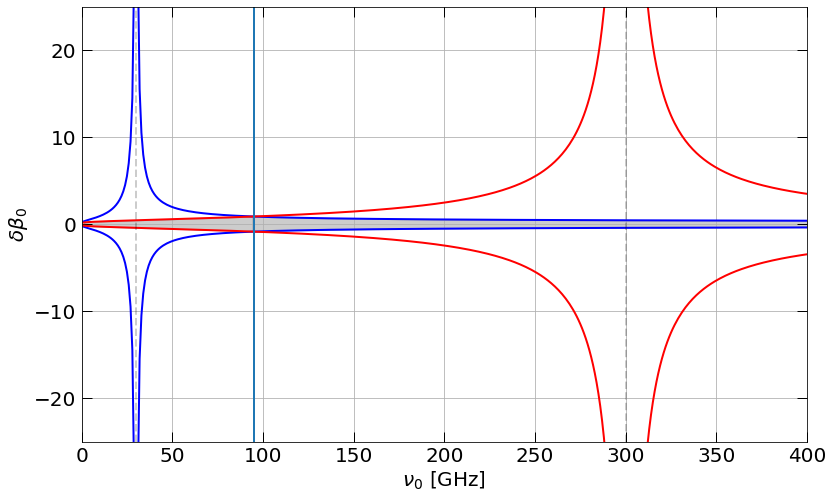

In [5]:
figure(figsize(13,8))
plot(x, y1, 'b')
plot(x, y2, 'b')
plot(x, z1, 'r')
plot(x, z2, 'r')
xlim(0,400)
ylim(-25,25)
fill_between(x, y1, y2, where= x>94, alpha=0.2, color='k')
fill_between(x, z1, z2, where= x<95, alpha=0.2, color='k')
xlabel(r'$\nu_0 \rm \ [GHz]$')
axvline(x=30, ls='--', color='k', alpha=0.2)
axvline(x=300, ls='--', color='k',alpha=0.2)
ylabel(r'$\delta \beta_0$')
axvline(x=95)
grid()

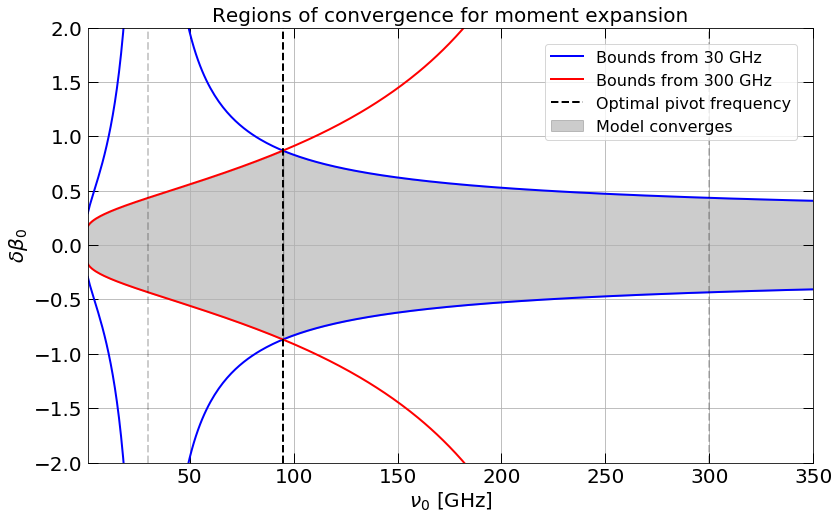

In [6]:
y4 = np.zeros_like(x)
y4[29:300] = 1
y5 = np.ones_like(x)*0.4
figure(figsize(13,8))
plot(x, y1, 'b', label='Bounds from 30 GHz')
plot(x, y2, 'b')
plot(x, z1, 'r', label='Bounds from 300 GHz')
plot(x, z2, 'r')
# plot(x, y5, color='g')
# plot(x, -y5, color='g')
xlim(1,350)
ylim(-2,2)
fill_between(x, y1, y2, where= x>94, alpha=0.2, color='k')
fill_between(x, z1, z2, where= x<96, alpha=0.2, color='k', label='Model converges')
# fill_between(x, y5, -y5, where=y4>0, color='g', alpha=0.2, hatch='X', label='Worst case (from experiment)')
xlabel(r'$\nu_0 \rm \ [GHz]$')
ylabel(r'$\delta \beta_0$')
axvline(x=30, ls='--', color='k', alpha=0.2)
axvline(x=300, ls='--', color='k',alpha=0.2)
axvline(x=95, ls='--', color='k', label='Optimal pivot frequency')
legend(loc='upper right', fontsize=16)
title('Regions of convergence for moment expansion');
grid()
savefig(filepath + 'convergence_regions.pdf', format='pdf', dpi=300)

In [5]:
# make some plots showing the progression of the model fitting
nu0 = 3.2e9

In [5]:
data_map = ff.map_full_power(freqs)

In [6]:
data_map.shape

(4, 196608)

In [7]:
power_spectrum = np.zeros((len(freqs),384))
for i in range(len(freqs)):
            power_spectrum[i] = hp.anafast(data_map[i])

In [8]:
data = power_spectrum

In [10]:
mom00 = ff.auto0x0(freqs)
mom11 = ff.auto1x1(freqs)
mom02 = ff.auto0x2(freqs)

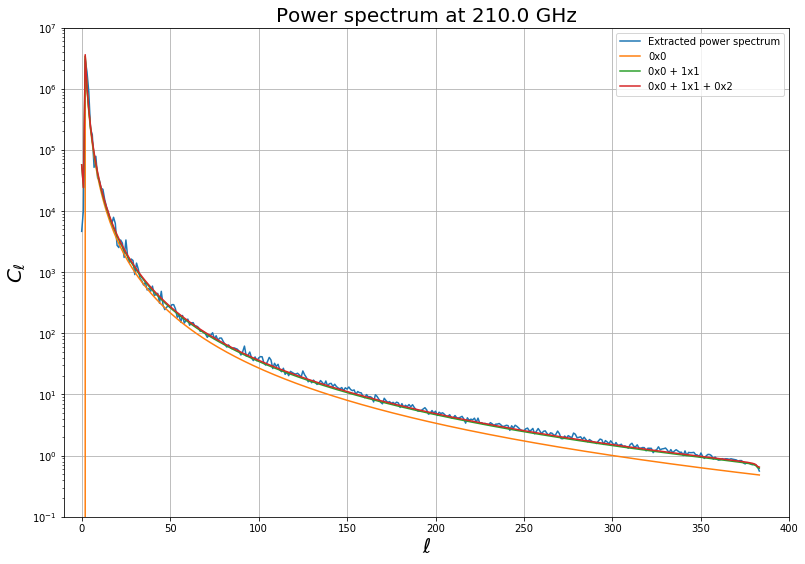

In [35]:
i=2
figure(figsize=(13,9))
semilogy(ells, data[i], label='Extracted power spectrum')
semilogy(ells, mom00[i], label='0x0')
semilogy(ells, mom00[i]+mom11[i], label='0x0 + 1x1')
semilogy(ells, mom00[i]+mom11[i]+mom02[i], label='0x0 + 1x1 + 0x2')
title('Power spectrum at ' + str(np.round(freqs[i]/1e9)) + ' GHz', fontsize=20)
xlabel('$\ell$', fontsize=20)
ylabel(r'$C_\ell$', fontsize=20)
xlim(-10,400)
ylim(1e-1, 1e7)
grid()
legend();
savefig(filepath + 'real_moments', dpi=300)